# Set Roulette Metagame Breakdown - January 2022

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import os
import sys
import inspect
import numpy as np
import pandas as pd
import sqlite3

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

from matplotlib import pyplot as plt

from analysis.deck_clustering import DeckClustering

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

DB_PATH = '../mtgmelee.db'

In [3]:
# helper to print out cluster decklists
def display_clusters(df):
    classifications = np.unique(df['classification'])
    for classification in classifications:
        dfc = df[df['classification'] == classification]
        dfc = dfc.loc[:, (dfc != 0).any(axis=0)]
        first_cols = ['classification', 'name', 'title', 'wins', 'losses']
        dfc = dfc.reindex(columns=(first_cols + list([col for col in dfc.columns if col not in first_cols])))
        dfc = dfc.rename(columns={
            'name': 'Player',
            'title': 'Deck Name',
            'classification': 'Cluster',
            'wins': 'Wins',
            'losses': 'Losses',
        })
        display(dfc)

In [4]:
d = DeckClustering(db_path=DB_PATH, tournament_id=8862)

## Heirarchical Deck Clustering

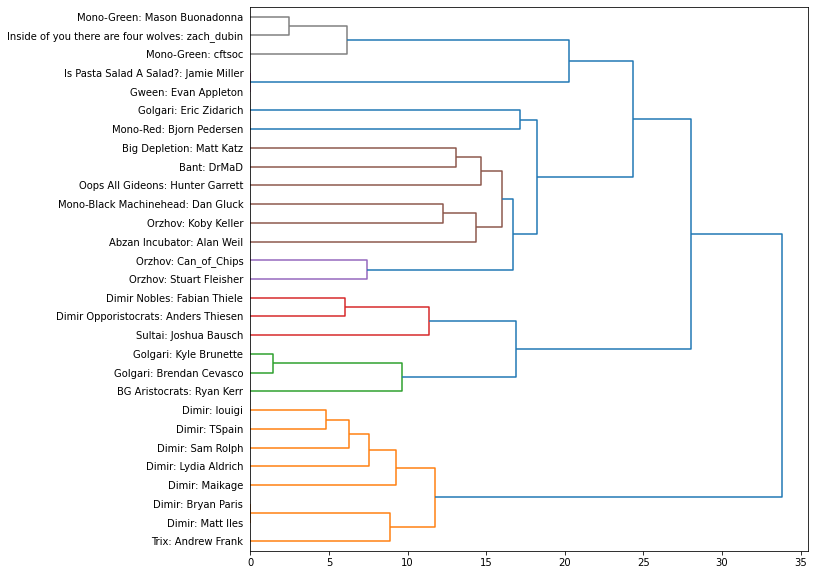

In [5]:
cluster_df, model = d.get_clusters_heirarchical(distance_threshold=16)
plt.figure(figsize=(10, 10))
d.plot_dendrogram(df=cluster_df, model=model, color_threshold=16)

## Winrate Matrix


Note: The results only include matches from the swiss portion. There is a bug in the code that scraped results from the top 8

In [6]:
d.get_winrate_matrix(cluster_df, min_cluster_size=3)

,0,1,2,3,7,Other,Num Decks,Non-Mirror %,Non-Mirror Matches,Top Cards
Deck Cluster,,,,,,,,,,
0,"50%, 4","71%, 7","40%, 5","20%, 5","0%, 3","50%, 2",6,41%,22,"Gideon, Ally of Zendikar, Ruinous Path, Ob Nix..."
1,"29%, 7","50%, 10","50%, 2","0%, 3","25%, 4","71%, 7",8,38%,24,"Demonic Pact, Brainstorm, Jace, Vryn's Prodigy..."
2,"60%, 5","50%, 2",NaN,"75%, 4","0%, 2","100%, 1",3,57%,14,"Hangarback Walker, Eldrazi Skyspawner, Opposition"
3,"80%, 5","100%, 3","25%, 4","50%, 2","0%, 1",NaN,3,62%,13,"Zulaport Cutthroat, Hangarback Walker, Nantuko..."
7,"100%, 3","75%, 4","100%, 2","100%, 1",NaN,"40%, 5",3,74%,19,"Rofellos, Llanowar Emissary, Ulamog, the Cease..."
Other,"50%, 2","29%, 7","0%, 1",NaN,"60%, 5","50%, 6",6,41%,17,"Ulamog, the Ceaseless Hunger, Conduit of Ruin,..."


## Decklists

In [7]:
display_clusters(d.combine_small_clusters(cluster_df, min_cluster_size=3))

,Cluster,Player,Deck Name,Wins,Losses,Academy Rector,Auramancer,Aven Riftwatcher,Cho-Manno's Blessing,Clear the Land,Consul's Lieutenant,Damnation,Dark Ritual,Deftblade Elite,Dispel,"Drana, Liberator of Malakir",Erebos's Titan,Evolution Charm,Evolutionary Leap,Expedition Envoy,Felidar Cub,Felidar Sovereign,From Beyond,Gather the Pack,"Gideon, Ally of Zendikar",Hangarback Walker,"Jace, Vryn's Prodigy // Jace, Telepath Unbound","Kiora, Master of the Depths",Knight of the White Orchid,"Kytheon, Hero of Akros // Gideon, Battle-Forged",Last Breath,"Liliana, Heretical Healer // Liliana, Defiant Necromancer",Magus of the Bazaar,Mana Tithe,Negate,Nissa's Revelation,"Nissa, Vastwood Seer // Nissa, Sage Animist",Ob Nixilis Reignited,Oblivion Sower,Opposition,Phyrexian Negator,Plated Crusher,Quarantine Field,Read the Bones,Reave Soul,Replenish,Ruinous Path,Seal of Primordium,Seek the Wilds,Sigil of the Empty Throne,Sire of Stagnation,Starfield of Nyx,Stasis Snare,Sunlance,Transgress the Mind,Treachery,"Ulamog, the Ceaseless Hunger",Urza's Incubator,Vendetta,Vine Trellis,Void Winnower,Woodland Bellower,Yavimaya Elder,Zendikar's Roil,id
1,0,Hunter Garrett,Oops All Gideons,3,2,0.0,0.0,0.0,2.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,198053
3,0,Alan Weil,Abzan Incubator,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,3.0,0.0,198071
5,0,Koby Keller,Orzhov,3,2,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,198085
13,0,DrMaD,Bant,0,2,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,2.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,198152
15,0,Dan Gluck,Mono-Black Machinehead,2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,198154
21,0,Matt Katz,Big Depletion,3,2,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,198163


,Cluster,Player,Deck Name,Wins,Losses,Anticipate,Brainstorm,Clash of Wills,Counterspell,Damnation,Dark Petition,Dark Ritual,Demonic Pact,Disperse,Donate,Extirpate,"Jace, Vryn's Prodigy // Jace, Telepath Unbound",Negate,Ob Nixilis Reignited,Orbs of Warding,Read the Bones,Ruinous Path,Snuff Out,Transgress the Mind,Treachery,Unmask,Vendetta,id
0,1,Andrew Frank,Trix,1,3,4.0,2.0,0.0,4.0,2.0,3.0,4.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,2.0,198048
6,1,Maikage,Dimir,0,3,4.0,4.0,1.0,2.0,1.0,2.0,4.0,3.0,0.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,198095
10,1,TSpain,Dimir,1,2,3.0,4.0,1.0,4.0,4.0,1.0,0.0,4.0,0.0,3.0,0.0,4.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,198144
24,1,louigi,Dimir,1,4,0.0,4.0,0.0,4.0,4.0,2.0,0.0,4.0,2.0,2.0,0.0,4.0,0.0,3.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,198167
25,1,Lydia Aldrich,Dimir,3,2,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,0.0,2.0,0.0,3.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,198170
26,1,Matt Iles,Dimir,4,2,0.0,4.0,0.0,0.0,2.0,4.0,4.0,4.0,3.0,3.0,0.0,3.0,1.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,2.0,198173
27,1,Sam Rolph,Dimir,1,2,0.0,3.0,1.0,4.0,4.0,2.0,0.0,4.0,1.0,2.0,0.0,4.0,1.0,0.0,0.0,2.0,1.0,3.0,2.0,0.0,0.0,0.0,198174
28,1,Bryan Paris,Dimir,3,2,0.0,4.0,0.0,0.0,2.0,4.0,4.0,4.0,3.0,3.0,0.0,3.0,1.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,2.0,198179


,Cluster,Player,Deck Name,Wins,Losses,Altar's Reap,Brainstorm,Brood Butcher,Carrier Thrall,Catacomb Sifter,Eldrazi Skyspawner,Elvish Visionary,Endless One,Evolutionary Leap,Faerie Miscreant,Hangarback Walker,"Liliana, Heretical Healer // Liliana, Defiant Necromancer",Nantuko Husk,"Nissa, Vastwood Seer // Nissa, Sage Animist",Opposition,Piracy Charm,Snuff Out,Whirler Rogue,Zulaport Cutthroat,id
8,2,Anders Thiesen,Dimir Opporistocrats,2,2,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,4.0,4.0,1.0,4.0,0.0,4.0,0.0,3.0,4.0,4.0,198124
9,2,Joshua Bausch,Sultai,4,1,0.0,4.0,2.0,0.0,4.0,4.0,4.0,0.0,1.0,0.0,4.0,0.0,2.0,1.0,4.0,1.0,0.0,3.0,2.0,198134
22,2,Fabian Thiele,Dimir Nobles,2,3,1.0,0.0,0.0,4.0,0.0,4.0,0.0,4.0,0.0,0.0,4.0,2.0,4.0,0.0,3.0,0.0,2.0,4.0,4.0,198164


,Cluster,Player,Deck Name,Wins,Losses,Attrition,Blisterpod,Carrier Thrall,Catacomb Sifter,Caustic Caterpillar,Elvish Visionary,Evolutionary Leap,Hangarback Walker,"Liliana, Heretical Healer // Liliana, Defiant Necromancer",Nantuko Husk,Pattern of Rebirth,Smothering Abomination,"Ulamog, the Ceaseless Hunger",Zulaport Cutthroat,id
4,3,Ryan Kerr,BG Aristocrats,4,1,0.0,4.0,0.0,4.0,0.0,4.0,3.0,4.0,2.0,4.0,4.0,0.0,2.0,4.0,198077
11,3,Brendan Cevasco,Golgari,3,2,0.0,4.0,4.0,4.0,1.0,0.0,3.0,4.0,3.0,4.0,0.0,4.0,0.0,4.0,198147
17,3,Kyle Brunette,Golgari,2,3,1.0,4.0,4.0,4.0,0.0,0.0,3.0,4.0,3.0,4.0,0.0,4.0,0.0,4.0,198156


,Cluster,Player,Deck Name,Wins,Losses,Brood Monitor,Caustic Caterpillar,Citanul Woodreaders,Elvish Visionary,Evolutionary Leap,Eyeless Watcher,Food Chain,Hangarback Walker,Harmonize,Heart Warden,Howling Wolf,"Rofellos, Llanowar Emissary","Ulamog, the Ceaseless Hunger",Vine Trellis,Void Winnower,Woodland Bellower,id
2,7,cftsoc,Mono-Green,7,1,3.0,0.0,0.0,0.0,2.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,2.0,1.0,0.0,198068
12,7,zach_dubin,Inside of you there are four wolves,3,2,0.0,1.0,0.0,1.0,2.0,2.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,2.0,1.0,3.0,198151
14,7,Mason Buonadonna,Mono-Green,4,2,0.0,1.0,1.0,1.0,2.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,2.0,1.0,4.0,198153


,Cluster,Player,Deck Name,Wins,Losses,Abbot of Keral Keep,Bane of Bala Ged,Beastcaller Savant,"Chandra, Fire of Kaladesh // Chandra, Roaring Flame",Conduit of Ruin,Damnation,Dead // Gone,Dragon Fodder,Dwynen's Elite,"Dwynen, Gilt-Leaf Daen",Elvish Visionary,Exquisite Firecraft,Flame Jet,Gempalm Strider,"Gideon, Ally of Zendikar",Gnarlroot Trapper,Goblin Glory Chaser,Hangarback Walker,Heart Warden,Hedron Archive,Hunting Wilds,Jaddi Offshoot,Landslide,Leaf Gilder,Mage-Ring Bully,Mage-Ring Responder,Mark of Fury,Masticore,Metalworker,Nissa's Pilgrimage,Nissa's Renewal,Ob Nixilis Reignited,Oblivion Sower,Quarantine Field,"Rofellos, Llanowar Emissary",Ruinous Path,Shaman of the Pack,Skull of Ramos,Stone Rain,Sylvan Messenger,Thornbow Archer,Thran Dynamo,Tooth of Ramos,Touch of the Void,"Ulamog, the Ceaseless Hunger",Vendetta,Vine Trellis,id
7,Other,Bjorn Pedersen,Mono-Red,0,3,4.0,0.0,0.0,4.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,198116
16,Other,Stuart Fleisher,Orzhov,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,4.0,0.0,0.0,198155
18,Other,Eric Zidarich,Golgari,2,2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,4.0,0.0,0.0,3.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,198157
19,Other,Evan Appleton,Gween,1,3,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,198160
20,Other,Jamie Miller,Is Pasta Salad A Salad?,6,1,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,198161
23,Other,Can_of_Chips,Orzhov,1,2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,4.0,2.0,0.0,2.0,2.0,0.0,198165
